In [6]:
# 0 - Primero instalo pandas
!pip install pandas

In [33]:
# 0 - Cargo las librerías que necesito para el ejercicio de ML

#from utils import plot_decision_boundary, poly_linear_regression, CM_BRIGHT

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
%matplotlib inline 

In [35]:
# 0 - También cargo la librería sklearn 
import sklearn
sklearn.__version__

'1.5.1'

In [37]:
# 1 - Ahora empezamos la preparación de datos 
# 1.1 - Cargamos el dataset de airbnb

airbnb = pd.read_csv("airbnb-listings-extract.csv", sep=";")
airbnb.head(4)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."


In [39]:
# 1.2 - A continuación se eliminan las columnas no relevantes para el estudio (IDs, URLs, etc). Primero listo las cabeceras para saber qué columnas eliminar

print(airbnb.columns)



Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [41]:
# 1.2 Eliminación de las columnas. 

airbnb = airbnb.drop(['ID','Listing Url','Scrape ID','Last Scraped','Space','Description','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host About','Host Thumbnail Url','Host Picture Url','Host Verifications','Market','Smart Location','Country Code','Weekly Price','Monthly Price','Maximum Nights','Calendar Updated','Has Availability','First Review','Last Review','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','License','Jurisdiction Names','Name','Summary','Experiences Offered','Host Since','Host Location','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Neighbourhood','Host Listings Count','Host Total Listings Count','Neighbourhood Cleansed','Neighbourhood Group Cleansed','State','Latitude','Longitude','Calendar last Scraped','Cancellation Policy','Geolocation','Features','Calculated host listings count', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365'], axis=1)
airbnb.head(5).T
#airbnb.shape[0]

,0,1,2,3,4
Street,"Canyon Edge Drive, Austin, TX 78733, United St...","Barcelona, Barcelona 08010, Spain","Barcelona, Barcelona 08008, Spain","Barcelona, Barcelona 08009, Spain","L'Antiga Esquerra de l'Eixample, Barcelona, Ca..."
Neighbourhood,NaN,NaN,NaN,NaN,L'Antiga Esquerra de l'Eixample
City,Austin,Barcelona,Barcelona,Barcelona,Barcelona
Zipcode,78733,08010,08008,08009,08036
Country,United States,Spain,Spain,Spain,Spain
Property Type,Loft,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
Accommodates,2,4,4,8,5
Bathrooms,1.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,3.0,2.0


In [45]:
# 1.3 - Nos quedamos sólo con las muestras que son de Madrid

airbnb_Madrid = airbnb[airbnb['City'] == "Madrid"]

airbnb_Madrid.head(5).T
#print(airbnb_Madrid.shape)


,40,41,42,43,44
Street,"Madrid, Comunidad de Madrid 28007, Spain","Recoletos, Madrid, Comunidad de Madrid 28001, ...","Recoletos, Madrid, Comunidad de Madrid 28001, ...","Recoletos, Madrid, Comunidad de Madrid 28001, ...","Recoletos, Madrid, Comunidad de Madrid 28001, ..."
Neighbourhood,NaN,Recoletos,Recoletos,Recoletos,Recoletos
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,28007,28001,28001,28001,28001
Country,Spain,Spain,Spain,Spain,Spain
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Private room,Entire home/apt,Entire home/apt,Private room,Entire home/apt
Accommodates,2,2,3,1,6
Bathrooms,2.0,1.0,1.0,1.0,1.0
Bedrooms,1.0,0.0,0.0,1.0,2.0


In [49]:
# 1.4 Observando las características, vemos que sólo hay datos en 'Square Feet' en 314 filas, por lo que haremos un modelo con los datos sin esta característica

airbnb_Madrid_nocolsf = airbnb_Madrid.drop(['Square Feet'], axis=1)
print(airbnb_Madrid_nocolsf.shape)


(13207, 21)


In [53]:
# 1.4 Ahora hacemos la división entre train y test


from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb_Madrid_nocolsf, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./airbnb_Madrid_nocolsf_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./airbnb_Madrid_nocolsf_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

airbnb_Madrid_nocolsf_train = pd.read_csv('./airbnb_Madrid_nocolsf_train.csv', sep=';', decimal='.')
airbnb_Madrid_nocolsf_train.head(5).T

Dimensiones del dataset de training: (10565, 21)
Dimensiones del dataset de test: (2642, 21)


,0,1,2,3,4
Street,"Madrid, Community of Madrid, Spain","Madrid, Comunidad de Madrid 28017, Spain","Cortes, Madrid, Comunidad de Madrid 28014, Spain","Sol, Madrid, Comunidad de Madrid 28013, Spain","Pacifico, Madrid, Comunidad de Madrid 28007, S..."
Neighbourhood,NaN,NaN,Cortes,Sol,Pacifico
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,NaN,28017,28014,28013,28007
Country,Spain,Spain,Spain,Spain,Spain
Property Type,Apartment,House,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Private room
Accommodates,4,1,4,2,2
Bathrooms,1.0,1.0,1.0,1.0,2.0
Bedrooms,1.0,1.0,2.0,0.0,1.0


In [55]:
# 2 Aquí empieza el análisis exploratorio de los datos del dataset
# 2.1 - Cabeceras (head) - Después de eliminar las columnas sobrantes, quedan 22 columnas de datos (o características). 

airbnb_Madrid_nocolsf_train.head().T

,0,1,2,3,4
Street,"Madrid, Community of Madrid, Spain","Madrid, Comunidad de Madrid 28017, Spain","Cortes, Madrid, Comunidad de Madrid 28014, Spain","Sol, Madrid, Comunidad de Madrid 28013, Spain","Pacifico, Madrid, Comunidad de Madrid 28007, S..."
Neighbourhood,NaN,NaN,Cortes,Sol,Pacifico
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,NaN,28017,28014,28013,28007
Country,Spain,Spain,Spain,Spain,Spain
Property Type,Apartment,House,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Private room
Accommodates,4,1,4,2,2
Bathrooms,1.0,1.0,1.0,1.0,2.0
Bedrooms,1.0,1.0,2.0,0.0,1.0


In [57]:
# 2.2 - Descripción (describe) es un método de pandas que nos muestra diferentes métricas de cada característica, que servirán para ver la relación de algunas 
# características (variables independientes) con el precio (variable dependiente).
# Parece ser que hay unos Outliers: los valores máximos de Accomodates, Bathrooms, Bedrooms, Beds, Cleaning Fee, Extra People parecen Outliers

#airbnb_Madrid_train = pd.read_csv('./airbnb_Madrid_train.csv', sep=';', decimal='.')
airbnb_Madrid_nocolsf_train.describe()

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Reviews per Month
count,10565.000000,10523.000000,10545.000000,10522.000000,10558.000000,4479.000000,6256.000000,10565.000000,10565.000000,10565.000000,10565.000000,8378.000000
mean,3.182773,1.253587,1.293789,1.981753,65.771832,182.905336,29.535166,1.568102,7.403691,3.014576,22.973213,1.934709
std,1.986991,0.603839,0.832743,1.509860,56.347456,107.433671,25.960698,1.080018,11.145815,13.923215,38.299584,1.905633
min,1.000000,0.000000,0.000000,1.000000,9.000000,70.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.020000
25%,2.000000,1.000000,1.000000,1.000000,31.000000,100.000000,15.000000,1.000000,0.000000,1.000000,1.000000,0.480000
50%,2.000000,1.000000,1.000000,1.000000,52.000000,150.000000,25.000000,1.000000,0.000000,2.000000,7.000000,1.280000
75%,4.000000,1.000000,2.000000,2.000000,80.000000,200.000000,35.000000,2.000000,14.000000,3.000000,28.000000,2.900000
max,16.000000,8.000000,10.000000,16.000000,875.000000,990.000000,500.000000,16.000000,276.000000,1125.000000,446.000000,17.210000


In [59]:
# 2.3 - Tipos de datos (dtypes)

airbnb_Madrid_nocolsf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Street             10565 non-null  object 
 1   Neighbourhood      6998 non-null   object 
 2   City               10565 non-null  object 
 3   Zipcode            10215 non-null  object 
 4   Country            10565 non-null  object 
 5   Property Type      10565 non-null  object 
 6   Room Type          10565 non-null  object 
 7   Accommodates       10565 non-null  int64  
 8   Bathrooms          10523 non-null  float64
 9   Bedrooms           10545 non-null  float64
 10  Beds               10522 non-null  float64
 11  Bed Type           10565 non-null  object 
 12  Amenities          10483 non-null  object 
 13  Price              10558 non-null  float64
 14  Security Deposit   4479 non-null   float64
 15  Cleaning Fee       6256 non-null   float64
 16  Guests Included    105

In [61]:
# 2.4 - Is null.any devuelve si para cada característica hay algún null

airbnb_Madrid_nocolsf_train.isnull().any()


Street               False
Neighbourhood         True
City                 False
Zipcode               True
Country              False
Property Type        False
Room Type            False
Accommodates         False
Bathrooms             True
Bedrooms              True
Beds                  True
Bed Type             False
Amenities             True
Price                 True
Security Deposit      True
Cleaning Fee          True
Guests Included      False
Extra People         False
Minimum Nights       False
Number of Reviews    False
Reviews per Month     True
dtype: bool

In [63]:
# 2.5 - Solucionar los True de isnull sustituyendo por '0', o la media o la moda, según el caso

airbnb_Madrid_nocolsf_train['Neighbourhood'].fillna('0', inplace=True)
airbnb_Madrid_nocolsf_train['Zipcode'].fillna('0', inplace=True)
airbnb_Madrid_nocolsf_train['Bathrooms'].fillna(airbnb_Madrid_nocolsf_train['Bathrooms'].mode()[0], inplace=True)
airbnb_Madrid_nocolsf_train['Bedrooms'].fillna(airbnb_Madrid_nocolsf_train['Bedrooms'].mode()[0], inplace=True)
airbnb_Madrid_nocolsf_train['Beds'].fillna(airbnb_Madrid_nocolsf_train['Beds'].mode()[0], inplace=True)
airbnb_Madrid_nocolsf_train['Amenities'].fillna('0', inplace=True)
airbnb_Madrid_nocolsf_train['Price'].fillna(airbnb_Madrid_nocolsf_train['Price'].mean(), inplace=True)
airbnb_Madrid_nocolsf_train['Security Deposit'].fillna(airbnb_Madrid_nocolsf_train['Security Deposit'].mode()[0], inplace=True)
airbnb_Madrid_nocolsf_train['Cleaning Fee'].fillna(airbnb_Madrid_nocolsf_train['Cleaning Fee'].mode()[0], inplace=True)
airbnb_Madrid_nocolsf_train['Reviews per Month'].fillna(airbnb_Madrid_nocolsf_train['Reviews per Month'].mode()[0], inplace=True)


airbnb_Madrid_nocolsf_train.isnull().any()


C:\Users\usuario\AppData\Local\Temp\ipykernel_25692\1398657007.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_Madrid_nocolsf_train['Neighbourhood'].fillna('0', inplace=True)
C:\Users\usuario\AppData\Local\Temp\ipykernel_25692\1398657007.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Street               False
Neighbourhood        False
City                 False
Zipcode              False
Country              False
Property Type        False
Room Type            False
Accommodates         False
Bathrooms            False
Bedrooms             False
Beds                 False
Bed Type             False
Amenities            False
Price                False
Security Deposit     False
Cleaning Fee         False
Guests Included      False
Extra People         False
Minimum Nights       False
Number of Reviews    False
Reviews per Month    False
dtype: bool

In [67]:
# 2.6 - Correlación entre los datos. Primero creo otro dataframe con los datos correlacionables

airbnb_Madrid_nocolsf_train_corr = airbnb_Madrid_nocolsf_train.drop (['Street', 'Neighbourhood', 'City', 'Zipcode', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities'], axis=1)  
airbnb_Madrid_nocolsf_train_corr.corr()

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Reviews per Month
Accommodates,1.000000,0.317546,0.675557,0.820552,0.574567,0.242037,0.296523,0.577543,0.264841,0.002555,0.086196,0.069036
Bathrooms,0.317546,1.000000,0.417823,0.376018,0.342137,0.165157,0.244495,0.179413,0.081193,0.024260,-0.059999,-0.065788
Bedrooms,0.675557,0.417823,1.000000,0.691317,0.519088,0.217960,0.315717,0.429154,0.140966,0.014233,-0.021171,-0.031192
Beds,0.820552,0.376018,0.691317,1.000000,0.487119,0.195199,0.276602,0.456668,0.203189,-0.000521,0.040320,0.008046
Price,0.574567,0.342137,0.519088,0.487119,1.000000,0.295149,0.512853,0.363039,0.100316,0.029915,-0.030681,-0.056173
Security Deposit,0.242037,0.165157,0.217960,0.195199,0.295149,1.000000,0.280824,0.176396,0.101287,0.039398,-0.032778,-0.060440
Cleaning Fee,0.296523,0.244495,0.315717,0.276602,0.512853,0.280824,1.000000,0.162155,0.058792,0.078233,-0.070784,-0.114265
Guests Included,0.577543,0.179413,0.429154,0.456668,0.363039,0.176396,0.162155,1.000000,0.335939,-0.000400,0.121515,0.100254
Extra People,0.264841,0.081193,0.140966,0.203189,0.100316,0.101287,0.058792,0.335939,1.000000,-0.016275,0.073336,0.013187
Minimum Nights,0.002555,0.024260,0.014233,-0.000521,0.029915,0.039398,0.078233,-0.000400,-0.016275,1.000000,-0.033667,-0.052837


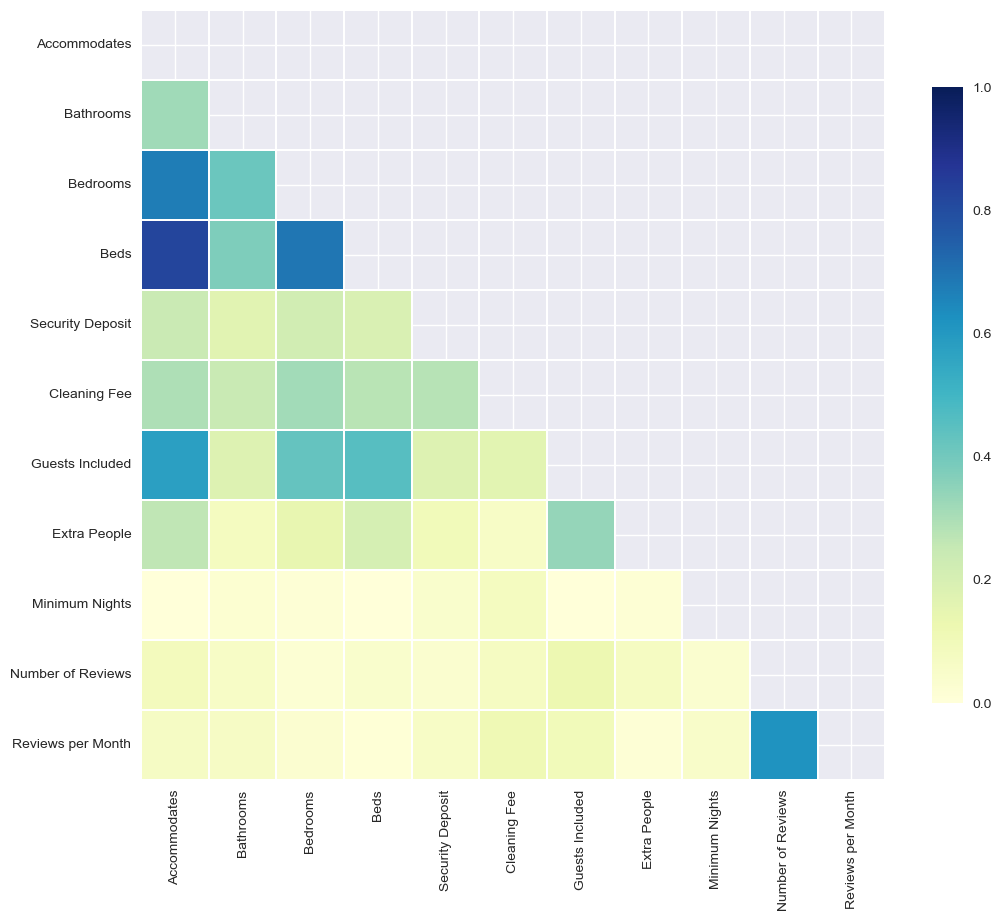

In [69]:
# 2.6.1 Representación gráfica de la correlación

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_Madrid_nocolsf_train_corr.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [ ]:
# 2.8 - Visualizaciones de los principales datos
# 2.8.1 - Histogramas de variables por separado

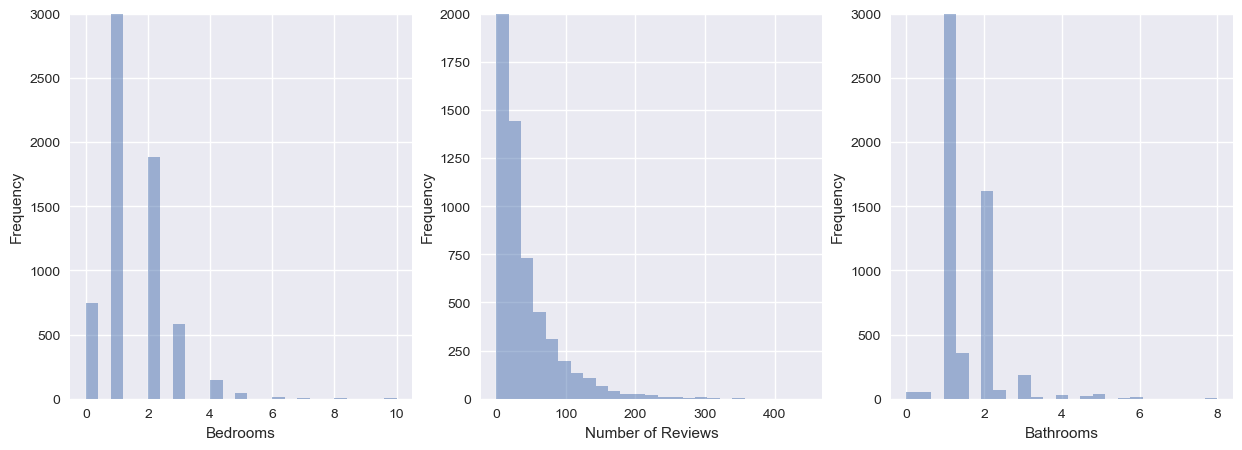

In [77]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_Madrid_nocolsf_train['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 3000)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
airbnb_Madrid_nocolsf_train['Number of Reviews'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 2000)
plt.xlabel('Number of Reviews')

plt.subplot(1,3,3)
airbnb_Madrid_nocolsf_train['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 3000)
plt.xlabel('Bathrooms')

plt.show()

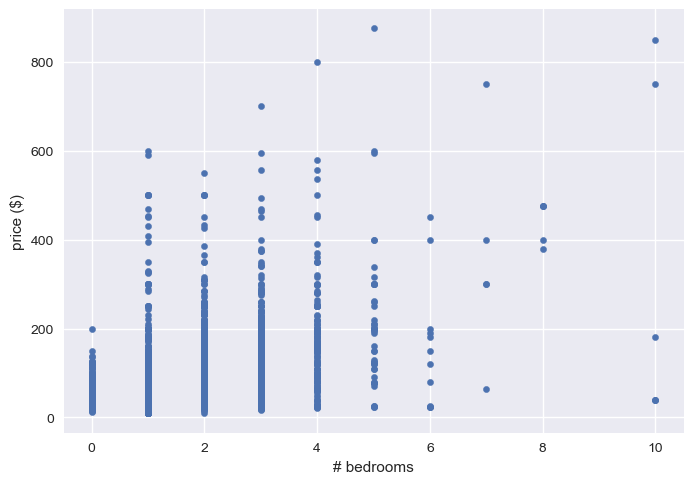

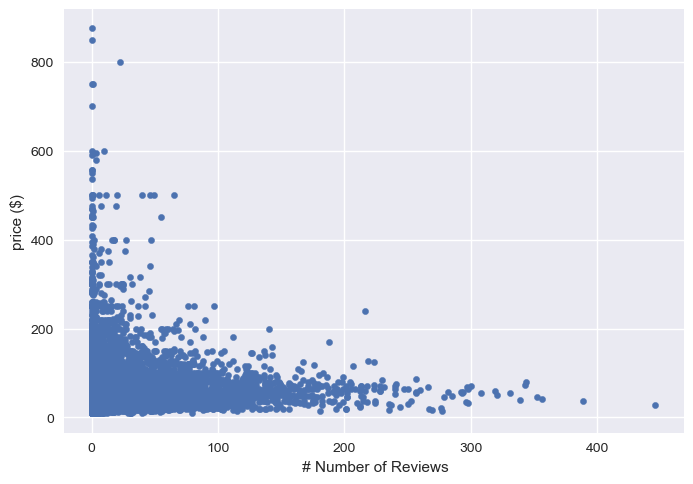

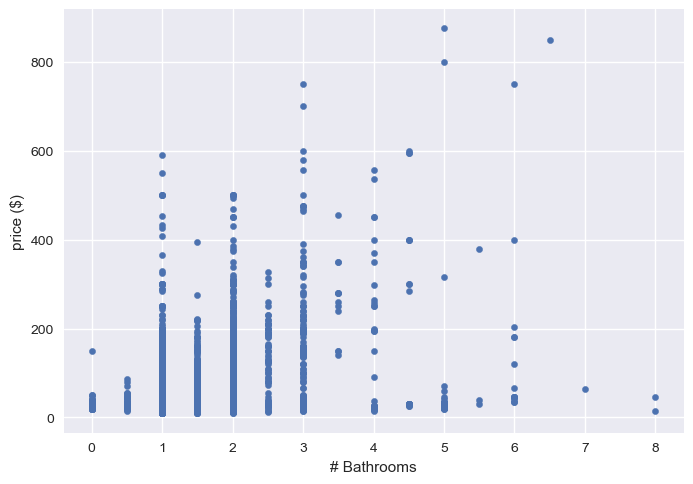

In [79]:
# 2.8.2 - Gráficas del precio en función de las principales características

# Sólo representamos 3: bedrooms, sqm meters y bathrooms
# el resto se puede repetir una a una

airbnb_Madrid_nocolsf_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

airbnb_Madrid_nocolsf_train.plot(kind = 'scatter',x='Number of Reviews',y = 'Price')
plt.xlabel(' # Number of Reviews')
plt.ylabel('price ($)')
plt.show()

airbnb_Madrid_nocolsf_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('price ($)')
plt.show()

In [113]:
# 2.8.3 - Eliminación de Outliers

# Según estas gráficas no hay Outliers, y revisando los máximos de .describe() tampoco parece que lo sean. 

airbnb_Madrid_nocolsf_train_corr = airbnb_Madrid_nocolsf_train_corr[airbnb_Madrid_nocolsf_train_corr ['Bedrooms'] < 8 ] 
airbnb_Madrid_nocolsf_train_corr = airbnb_Madrid_nocolsf_train_corr[airbnb_Madrid_nocolsf_train_corr ['Bathrooms'] < 7 ] 


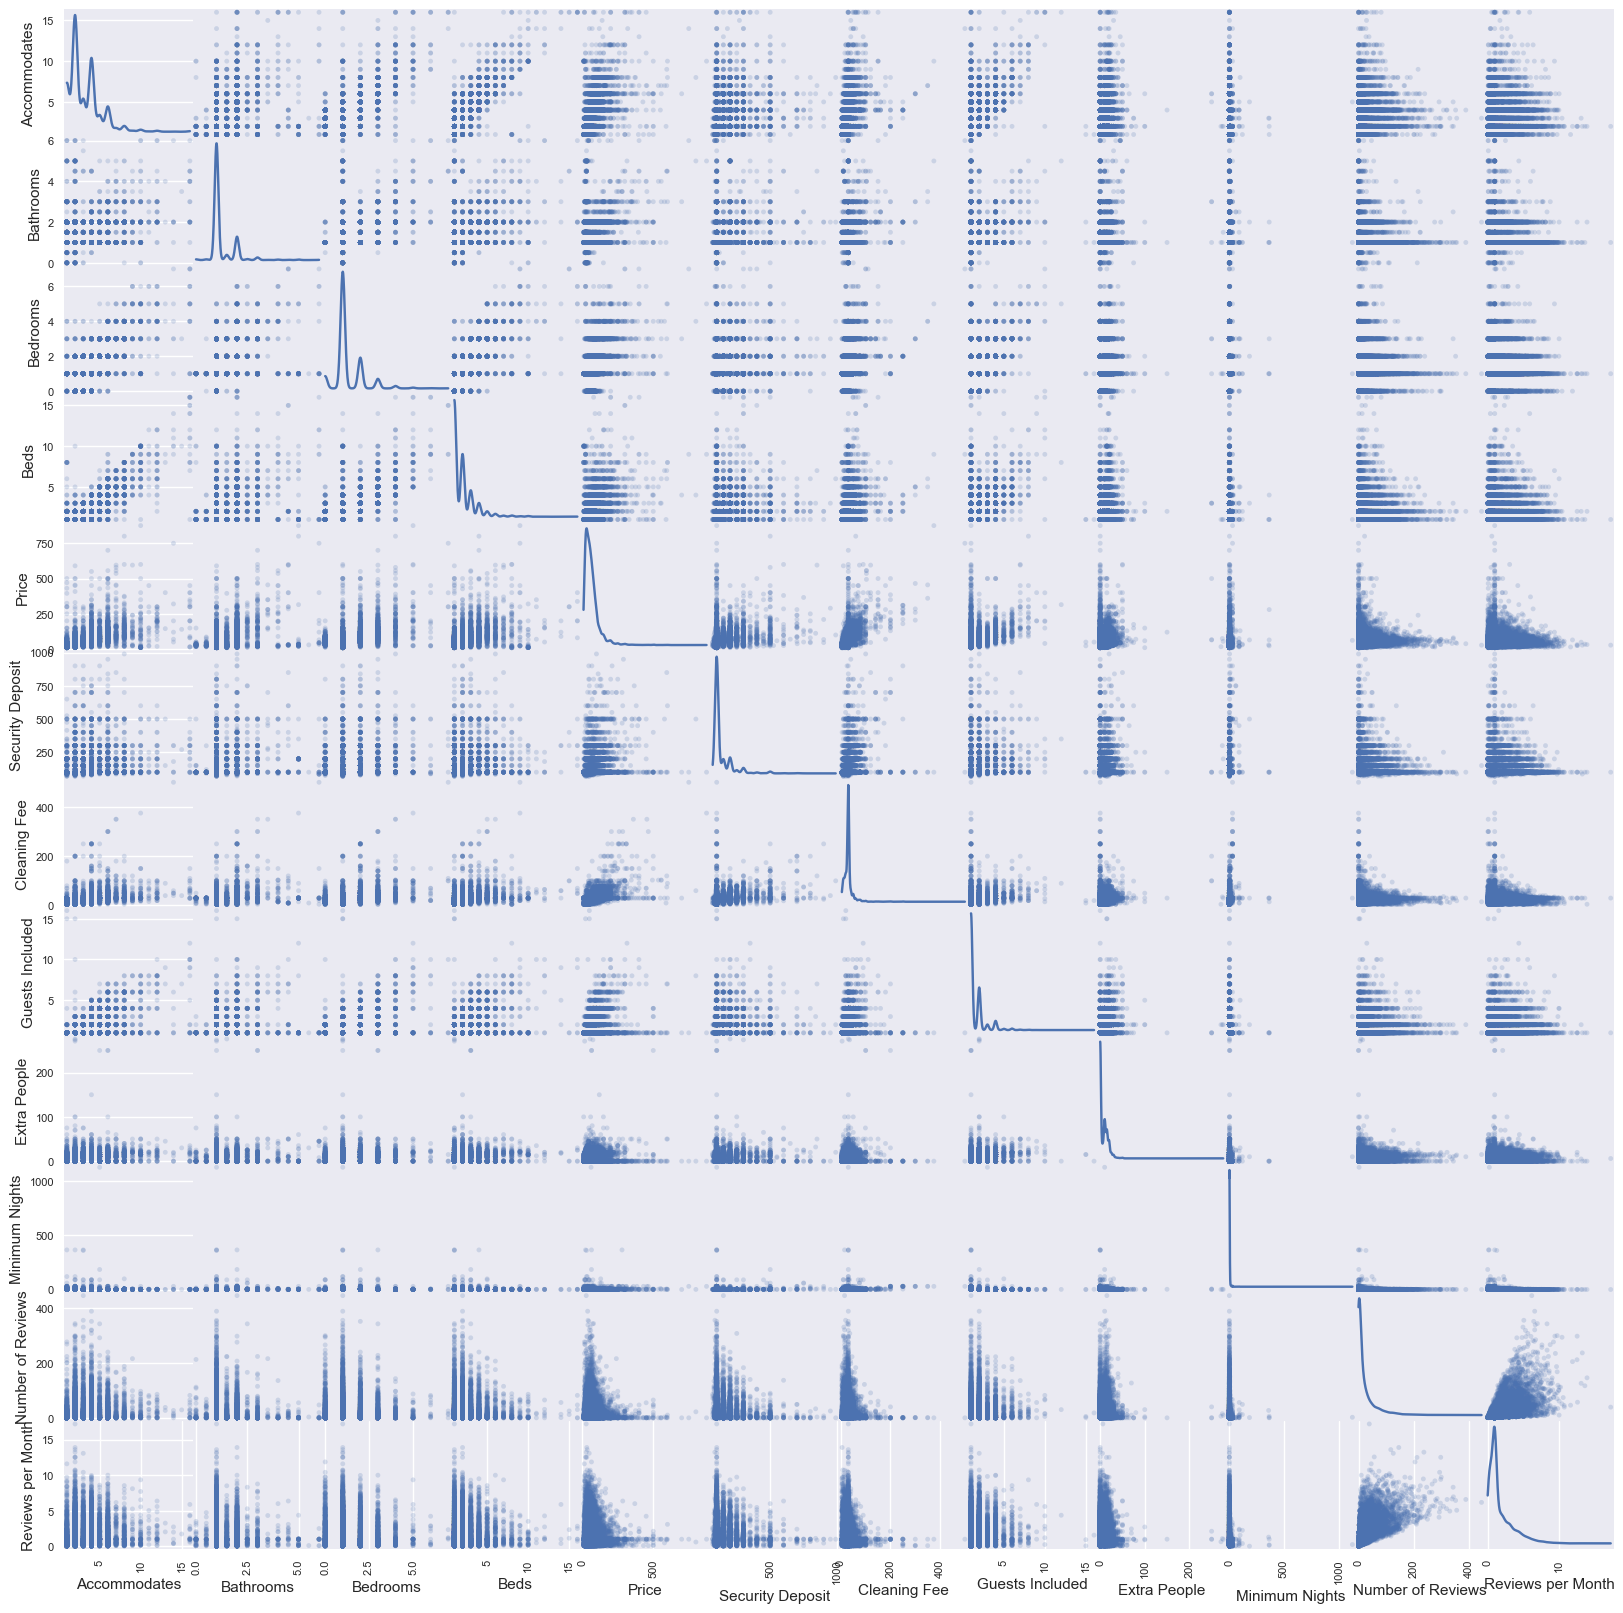

In [115]:
# 2.9 - Representación de todas las variables

pd.plotting.scatter_matrix(airbnb_Madrid_nocolsf_train_corr, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [ ]:
# 3 - Preprocesado
# Hemos eliminado las variables que no son necesarias
# Ahora vamos a estudiar la selección Random Forest / Lasso

In [83]:
# 3.1 - Se cogen los datos de test y se aplican los resultados del análisis hecho en train

airbnb_Madrid_nocolsf_test = pd.read_csv('./airbnb_Madrid_nocolsf_test.csv', sep=';', decimal='.')


# Solucionar isnull
airbnb_Madrid_nocolsf_test['Neighbourhood'].fillna('0', inplace=True)
airbnb_Madrid_nocolsf_test['Zipcode'].fillna('0', inplace=True)
airbnb_Madrid_nocolsf_test['Bathrooms'].fillna(airbnb_Madrid_nocolsf_test['Bathrooms'].mode()[0], inplace=True)
airbnb_Madrid_nocolsf_test['Bedrooms'].fillna(airbnb_Madrid_nocolsf_test['Bedrooms'].mode()[0], inplace=True)
airbnb_Madrid_nocolsf_test['Beds'].fillna(airbnb_Madrid_nocolsf_test['Beds'].mode()[0], inplace=True)
airbnb_Madrid_nocolsf_test['Amenities'].fillna('0', inplace=True)
airbnb_Madrid_nocolsf_test['Price'].fillna(airbnb_Madrid_nocolsf_test['Price'].mean(), inplace=True)
airbnb_Madrid_nocolsf_test['Security Deposit'].fillna(airbnb_Madrid_nocolsf_test['Security Deposit'].mode()[0], inplace=True)
airbnb_Madrid_nocolsf_test['Cleaning Fee'].fillna(airbnb_Madrid_nocolsf_test['Cleaning Fee'].mode()[0], inplace=True)
airbnb_Madrid_nocolsf_test['Reviews per Month'].fillna(airbnb_Madrid_nocolsf_test['Reviews per Month'].mode()[0], inplace=True)

airbnb_Madrid_nocolsf_test.isnull().any()







C:\Users\usuario\AppData\Local\Temp\ipykernel_25692\2992005721.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_Madrid_nocolsf_test['Neighbourhood'].fillna('0', inplace=True)
C:\Users\usuario\AppData\Local\Temp\ipykernel_25692\2992005721.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

Street               False
Neighbourhood        False
City                 False
Zipcode              False
Country              False
Property Type        False
Room Type            False
Accommodates         False
Bathrooms            False
Bedrooms             False
Beds                 False
Bed Type             False
Amenities            False
Price                False
Security Deposit     False
Cleaning Fee         False
Guests Included      False
Extra People         False
Minimum Nights       False
Number of Reviews    False
Reviews per Month    False
dtype: bool

In [117]:

# Drop de los datos no correlacionables

airbnb_Madrid_nocolsf_test_corr = airbnb_Madrid_nocolsf_test.drop (['Street', 'Neighbourhood', 'City', 'Zipcode', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities'], axis=1)  
#airbnb_Madrid_train_corr.corr()



# Segmentación de los datos separando variable dependiente de las independientes

X_train = airbnb_Madrid_nocolsf_train_corr.drop(columns=['Price']) 
y_train = airbnb_Madrid_nocolsf_train_corr.Price
X_test = airbnb_Madrid_nocolsf_test_corr.drop(columns=['Price']) 
y_test = airbnb_Madrid_nocolsf_test_corr.Price

print(X_train.isna().sum()) 

Accommodates         0
Bathrooms            0
Bedrooms             0
Beds                 0
Security Deposit     0
Cleaning Fee         0
Guests Included      0
Extra People         0
Minimum Nights       0
Number of Reviews    0
Reviews per Month    0
dtype: int64


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.3s
[CV] END ........................................max_depth=4; total time=   0.4s
[CV] END ........................................max_depth=4; total time=   0.4s
[CV] END .......................................

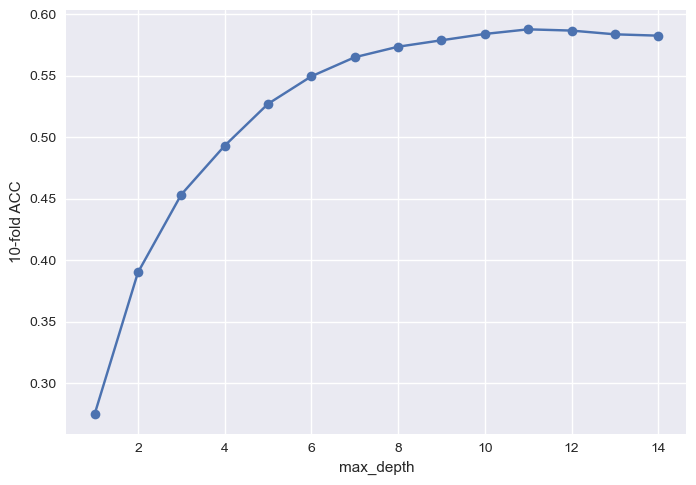

In [119]:
# 3.2 - Aplicación de Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
#print(y_train.isna().sum()) 

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [ ]:
# Vemos que el modelo no es bueno, porque sale un valor de Accuracy de 0,592. Sería bueno si se acercara más a 1. 

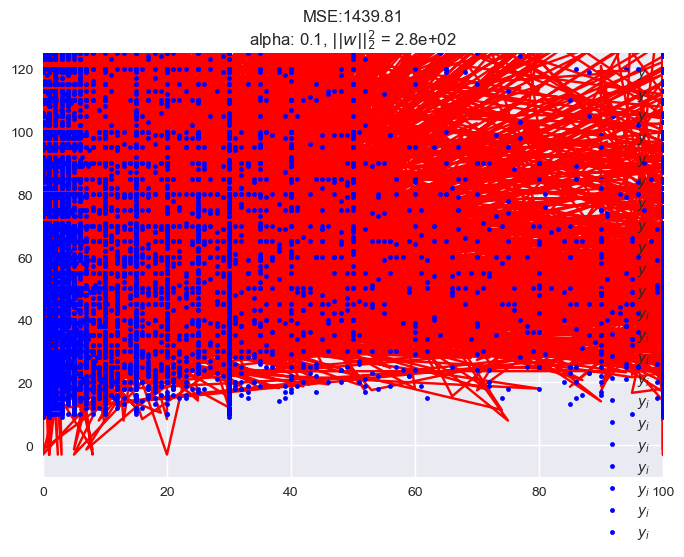

w1:  10.91588245195629
w2:  8.256196062787811
w3:  8.980226380037239
w4:  -2.6173035401397033
w5:  0.05225813316059329


In [95]:
# 3.2 - Aplicación de Lasso

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

degree = 5

#model
alpha = 0.1
lasso = Lasso(alpha = alpha).fit(X_train,y_train)
w = lasso.coef_
norm_w2 = np.dot(w,w.T)
    
# predicción
y_hat = lasso.predict(X_test)

# error
error_test = np.mean(np.power(y_test - y_hat,2)) 


# Definición de variables
x = X_test  # First feature in the test set (if it's univariate)
y_i = y_test  # Actual target values for the test set
#y_hat = model.predict(X_test)  # Predictions from the model for the test set

# g_x can be defined similarly if you are plotting model predictions
#g_x = lasso.predict(x.reshape(-1, 1))  # Model prediction on the test data
g_x = lasso.predict(x)  # Model prediction on the test data

plt.plot(x, g_x, 'r', label='$y$')  # Model's predicted values
plt.plot(x, y_i, 'b.', label='$y_i$')  # Actual test values
#plt.plot(x, y_hat, 'g', label='$\hat{y}$')  # Predicted y-values
#plt.title(f'Grado: {degree}, MSE:{error_test:.2f}\nalpha: {alpha:g}, $||w||_2^2$ = {norm_w2:.2g}')
plt.title(f'MSE:{error_test:.2f}\nalpha: {alpha:g}, $||w||_2^2$ = {norm_w2:.2g}')
plt.legend()
plt.xlim((0, 100))
plt.ylim((-10, 125))
plt.show()

coef_names = ['w' + str(i) + ': ' for i in range(1,degree+1)]

for f,wi in zip(coef_names,w):
    print(f,wi)

In [97]:
# 3.2 - Aplicación de Lasso (de Chat GPT)

# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


# Crear un modelo Lasso
lasso_model = Lasso(alpha=0.1)  # 'alpha' es el parámetro de regularización (hiperparámetro)

# Entrenar el modelo
lasso_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = lasso_model.predict(X_test)

# Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE) en el conjunto de prueba: {mse:.4f}")

# Ver los coeficientes de las características
print("Coeficientes del modelo Lasso:", lasso_model.coef_)

# Ver las características seleccionadas (coeficientes diferentes de cero)
selected_features = X_test.columns[lasso_model.coef_ != 0]
print("Características seleccionadas por el modelo Lasso:", selected_features)

Error cuadrático medio (MSE) en el conjunto de prueba: 1439.8139
Coeficientes del modelo Lasso: [10.91588245  8.25619606  8.98022638 -2.61730354  0.05225813  0.91399336
  2.9200957  -0.28980112 -0.02466003 -0.02077314 -0.84408156]
Características seleccionadas por el modelo Lasso: Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews', 'Reviews per Month'],
      dtype='object')


<>:45: SyntaxWarning: invalid escape sequence '\h'
<>:45: SyntaxWarning: invalid escape sequence '\h'
C:\Users\usuario\AppData\Local\Temp\ipykernel_25692\775021014.py:45: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(x_i,y_hat,'g',label='$\hat{y}$')


(10565, 6)
(10565,)
(2642, 6)
(2642,)


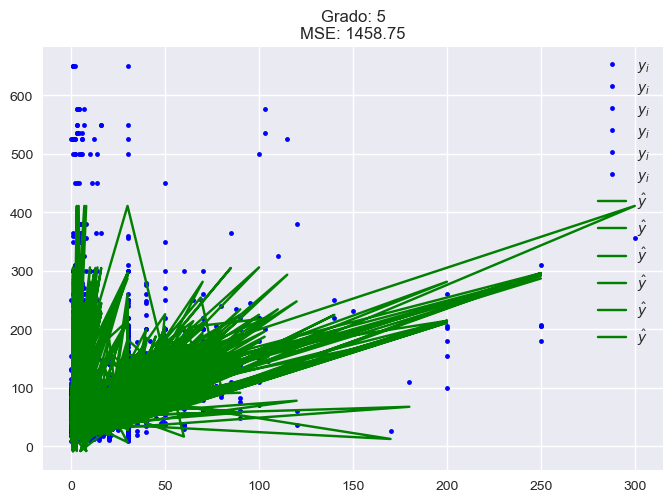

w0:  -18.265204435328215
w1:  11.583191027910441
w2:  9.018077655936699
w3:  10.389079939944326
w4:  -3.195533102608474
w5:  0.9685660840811082

||w||_2^2 = 3.3e+02


In [99]:
# 3.3 - Aplicación de un modelo base (simple) de regresión lineal con las variables, escojo m2, bedrooms, Accomodates, Bathrooms, Cleaning Fee, minimum nights
# para comparar el error MSE

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

degree = 5

# features
poly = PolynomialFeatures(degree) # generamos x^j
X_train_RL = X_train.drop(columns=['Security Deposit', 'Guests Included', 'Extra People', 'Number of Reviews', 'Reviews per Month'])

y_train_RL = y_train

X_test_RL = X_test.drop(columns=['Security Deposit', 'Guests Included', 'Extra People', 'Number of Reviews', 'Reviews per Month'])

y_test_RL = y_test

# Pintar dimensiones de los 4
print(X_train_RL.shape)
print(y_train_RL.shape)
print(X_test_RL.shape)
print(y_test_RL.shape)


# pista: como siempre, instanciar el modelo y .fit()
lr = LinearRegression().fit(X_train_RL, y_train_RL)

# predicción
y_hat = lr.predict(X_test_RL)

# Cálculo del error
mse = np.mean((y_test_RL-y_hat)**2)

# Identificación de variables
x = X_train_RL
g_x = y_train_RL
x_i = X_test_RL
y_i = y_test_RL

# Representación gráfica

#plt.plot(x,g_x,'r',label='$y$')
plt.plot(x_i,y_i,'b.',label='$y_i$')
plt.plot(x_i,y_hat,'g',label='$\hat{y}$')
plt.title(f'Grado: {degree}\nMSE: {mse:.2f}')
plt.legend()
#plt.xlim((0, 1))
#plt.ylim((-2, 2))
plt.show()

# Mostramos los coeficientes del modelo
print('w0: ', lr.intercept_)

w = lr.coef_
norm_w2 = np.dot(w,w.T) # no se tiene en cuenta el intercepto

coef_names = ['w' + str(i) + ': ' for i in range(1,degree+1)]
for f,wi in zip(coef_names,w):
    print(f,wi)

print(f'\n||w||_2^2 = {norm_w2:.2g}')





In [101]:
# 4 - Aplicación de cross-validation manualmente

from sklearn.model_selection import KFold

# Crear el objeto KFold
kf = KFold(n_splits=5)

# Iterar sobre los splits y entrenar/validar el modelo
scores = []
for train_index, test_index in kf.split(X_train):
    X_train_CV, X_test_CV = X_train[train_index], X_test[test_index]
    y_train_CV, y_test_CV = y_train[train_index], y_test[test_index]
    
    # Entrenar el modelo
    model.fit(X_train_CV, y_train_CV)
    
    # Evaluar el modelo
    score = model.score(X_test_CV, y_test_CV)
    scores.append(score)

print("Scores de cada fold: ", scores)
print("Promedio de la validación cruzada: ", sum(scores)/len(scores))

KeyError: "None of [Index([ 2113,  2114,  2115,  2116,  2117,  2118,  2119,  2120,  2121,  2122,\n       ...\n       10555, 10556, 10557, 10558, 10559, 10560, 10561, 10562, 10563, 10564],\n      dtype='int32', length=8452)] are in the [columns]"